In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings 
warnings.filterwarnings("ignore")

In [28]:
#load the dataset
df=pd.read_csv('Lsales_data.csv')

df

,S. No.,Order ID,LaptopQuantity,Transaction ID,Age,RAM_Size (GB),Storage_Size (GB),Processor_Type,Brand,Warranty_Years,Discount_Applied (%),Shipping_Cost,Is_Bundle_Deal,Review_Rating,Price
0,1,1001,4,4001,33,32,1024,i7,HP,3,15,484,0,2,51232
1,2,1002,3,4002,50,8,1024,i7,Asus,1,5,432,0,4,39580
2,3,1003,3,4003,30,16,1024,Ryzen 5,Asus,3,20,154,0,3,40602
3,4,1004,6,4004,58,8,256,i7,Apple,1,0,295,0,5,53407
4,5,1005,2,4005,51,8,512,i3,Asus,2,15,311,0,2,32635
5,6,1006,1,4006,18,32,512,Ryzen 5,Lenovo,1,5,461,1,1,35785
6,7,1007,4,4007,59,4,256,Ryzen 5,HP,1,15,147,1,2,40559
7,8,1008,3,4008,32,32,1024,i7,HP,3,0,170,0,3,47418
8,9,1009,1,4009,59,8,512,i3,Dell,1,15,246,1,3,27370
9,10,1010,1,4010,45,32,256,i7,Dell,1,20,340,1,2,33652


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   S. No.                15 non-null     int64 
 1   Order ID              15 non-null     int64 
 2   LaptopQuantity        15 non-null     int64 
 3   Transaction ID        15 non-null     int64 
 4   Age                   15 non-null     int64 
 5   RAM_Size (GB)         15 non-null     int64 
 6   Storage_Size (GB)     15 non-null     int64 
 7   Processor_Type        15 non-null     object
 8   Brand                 15 non-null     object
 9   Warranty_Years        15 non-null     int64 
 10  Discount_Applied (%)  15 non-null     int64 
 11  Shipping_Cost         15 non-null     int64 
 12  Is_Bundle_Deal        15 non-null     int64 
 13  Review_Rating         15 non-null     int64 
 14  Price                 15 non-null     int64 
dtypes: int64(13), object(2)
memory usage: 1.9+

In [30]:
df.describe()

,S. No.,Order ID,LaptopQuantity,Transaction ID,Age,RAM_Size (GB),Storage_Size (GB),Warranty_Years,Discount_Applied (%),Shipping_Cost,Is_Bundle_Deal,Review_Rating,Price
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,1008.000000,2.866667,4008.000000,45.666667,17.600000,665.600000,1.800000,10.666667,289.533333,0.466667,2.866667,40527.400000
std,4.472136,4.472136,1.641718,4.472136,12.533764,11.293487,359.443379,0.941124,7.527727,129.075209,0.516398,1.060099,8789.963545
min,1.000000,1001.000000,1.000000,4001.000000,18.000000,4.000000,256.000000,1.000000,0.000000,144.000000,0.000000,1.000000,27370.000000
25%,4.500000,1004.500000,1.500000,4004.500000,37.000000,8.000000,256.000000,1.000000,5.000000,162.000000,0.000000,2.000000,34585.500000
50%,8.000000,1008.000000,3.000000,4008.000000,50.000000,16.000000,512.000000,1.000000,15.000000,295.000000,0.000000,3.000000,39580.000000
75%,11.500000,1011.500000,4.000000,4011.500000,55.000000,32.000000,1024.000000,3.000000,15.000000,386.000000,1.000000,3.500000,46518.000000
max,15.000000,1015.000000,6.000000,4015.000000,59.000000,32.000000,1024.000000,3.000000,20.000000,492.000000,1.000000,5.000000,57340.000000


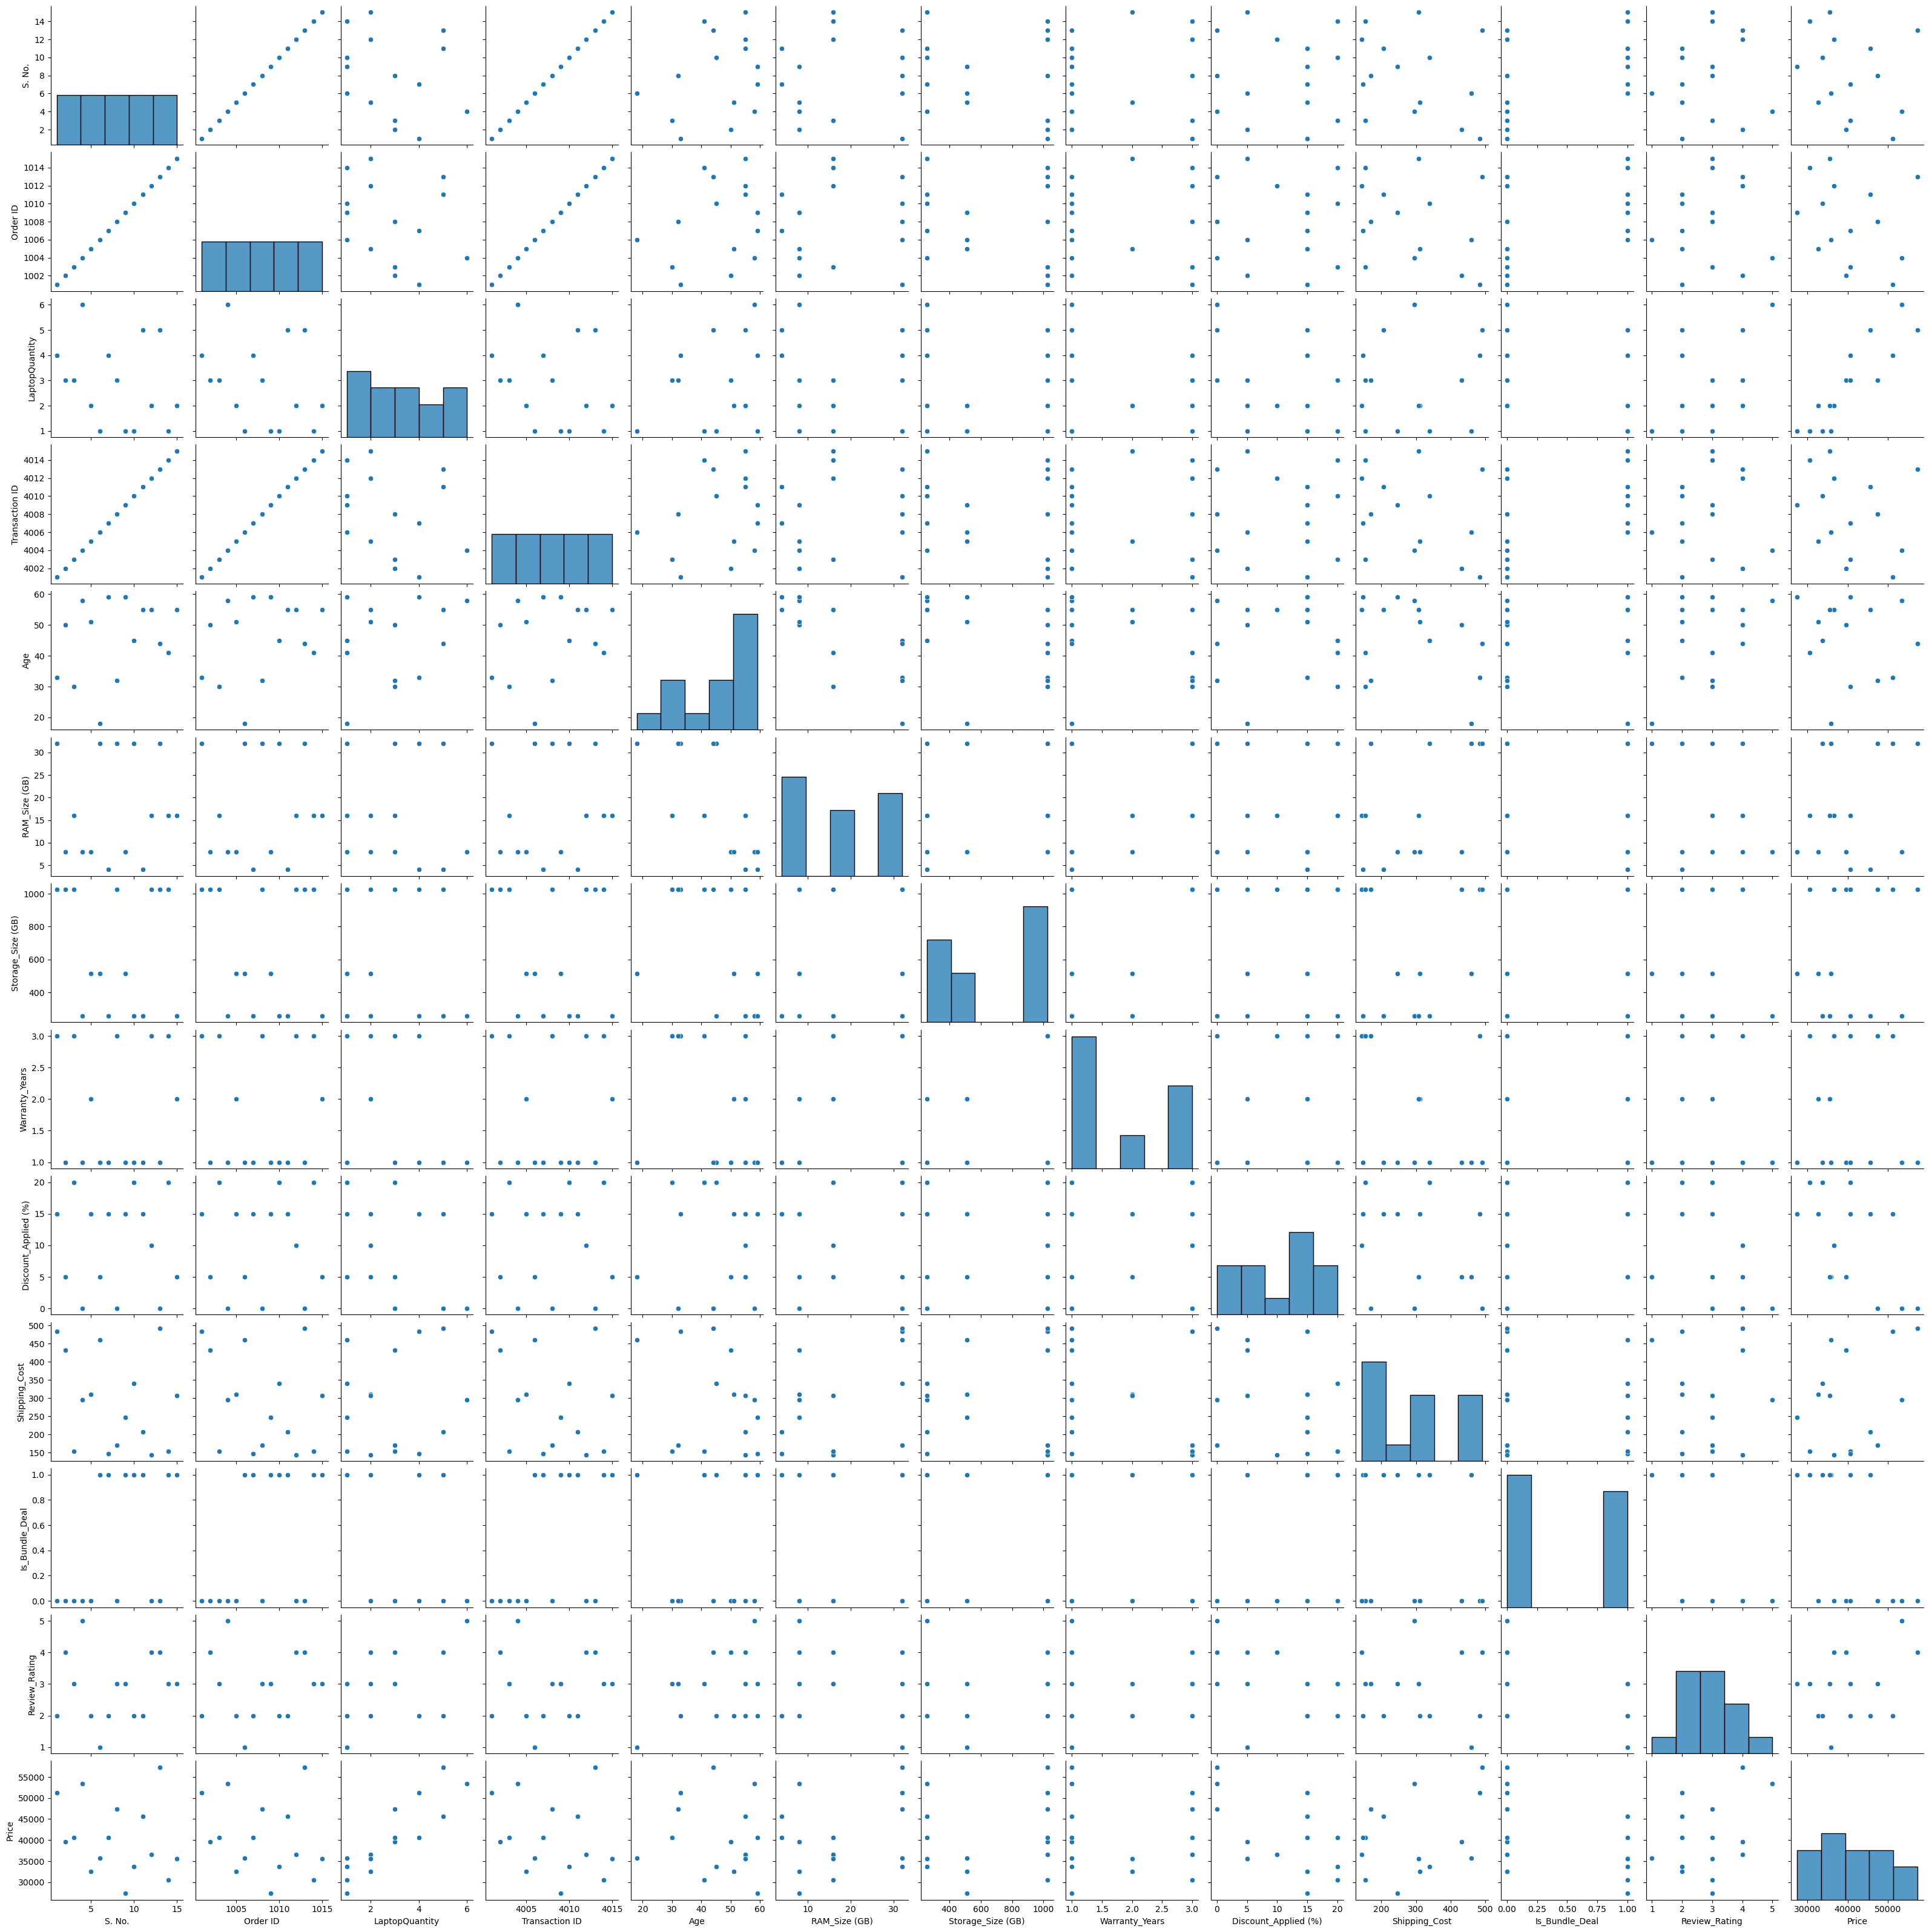

ValueError: could not convert string to float: 'i7'

In [32]:
#Pairplot to visualize relatoinship between variables
sns.pairplot(df)
plt.show()

#correlation matrix
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

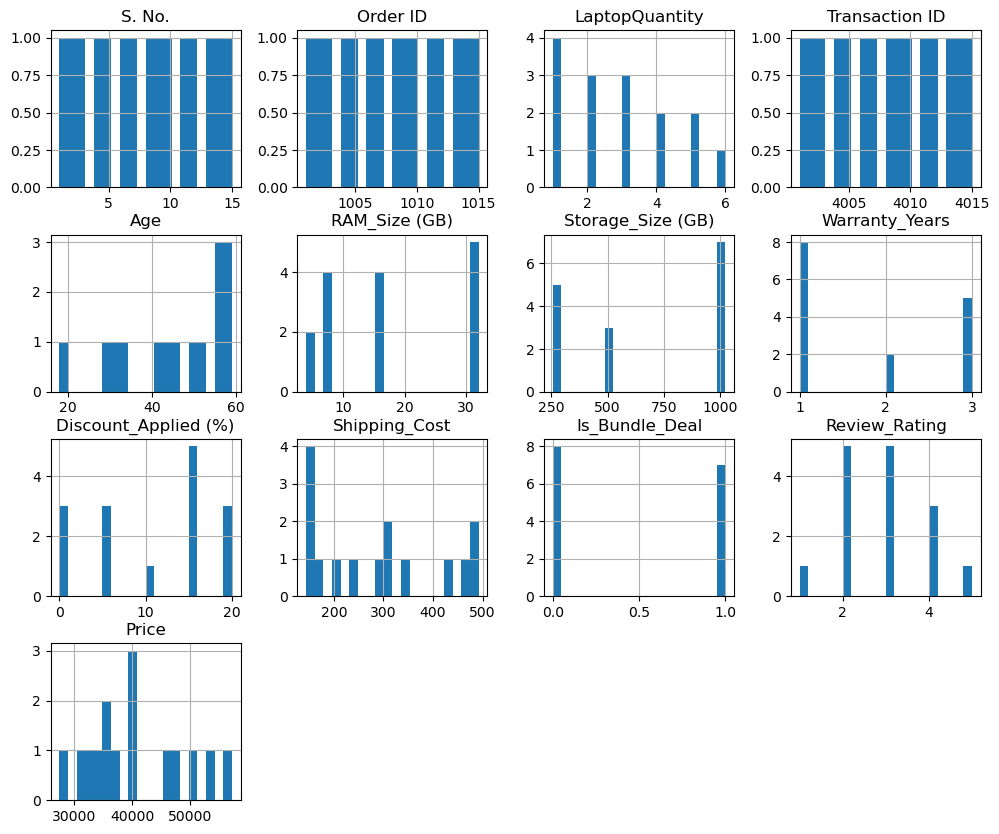

ValueError: num must be an integer with 1 <= num <= 9, not 10

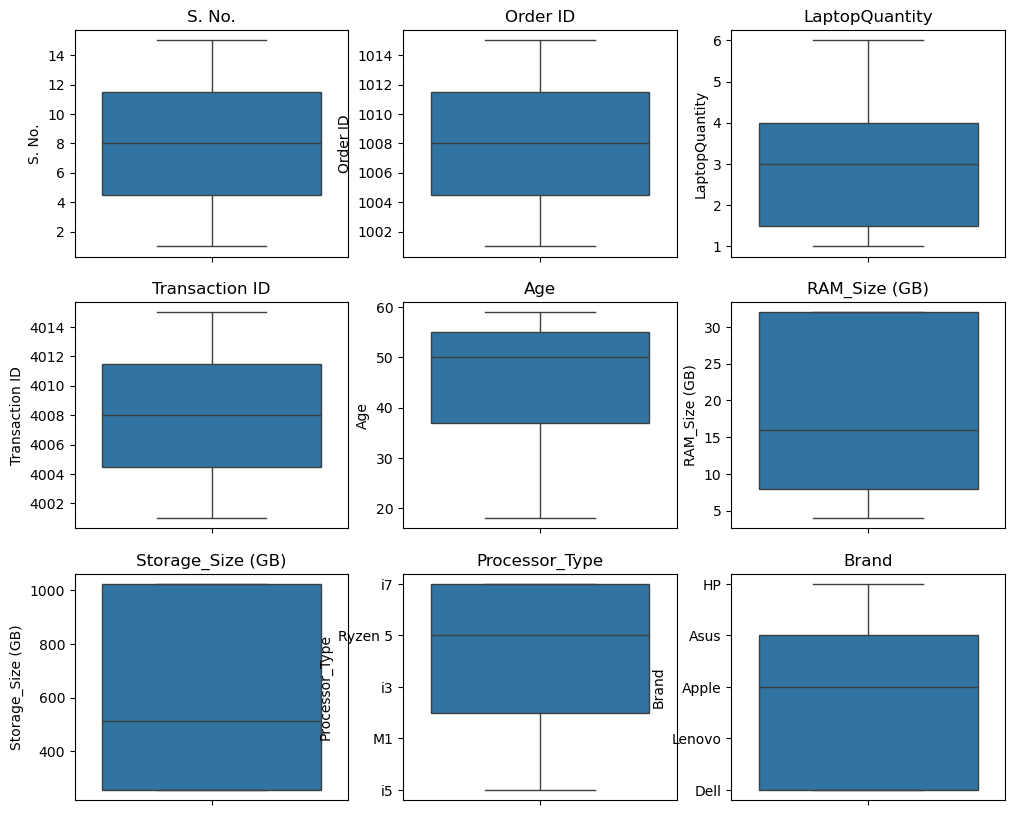

In [33]:
#Histtogram of individual feature
df.hist(figsize=(12,10), bins=20)
plt.show()

#box plot to check for outliers
plt.figure(figsize=(12,10))
for i, column in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
#Simple Linear Regression
#define the target variable & the prdicted variable
x=df[['LaptopQuantity']]  #Predictor
y=df[['Price']] #Target

In [ ]:
#Split the dataset into tarining & testing set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
#Creating & train the model

In [ ]:
simple_model = LinearRegression()
simple_model.fit(x_train, y_train)

Mean squared Error:68058.03635116584
R^2 Score: 0.9975213406724853


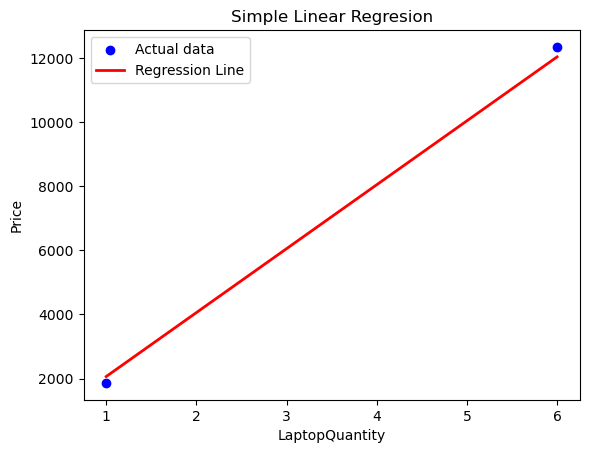

In [36]:
#Predictor
y_pred=simple_model.predict(x_test)

#Evaluate the model
print(f'Mean squared Error:{mean_squared_error(y_test,y_pred)}')
print(f'R^2 Score: {r2_score(y_test,y_pred)}')

#plot the regression line

plt.scatter(x_test, y_test, color='blue', label='Actual data')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('LaptopQuantity')
plt.ylabel('Price')
plt.title("Simple Linear Regresion")
plt.legend()
plt.show()

In [53]:
#Assuming the model has already been trained & relevant libraries have been imported

#input Laptop Quantity value from user
LaptopQuantity_value=float(input("Enter The Quantity Of Laptops:"))

#Coverrt input to a 2D array for the model
LaptopQuantity_value_array= np.array([[LaptopQuantity_value]])

#Predict the price using trained data

predicted_price= simple_model.predict(LaptopQuantity_value_array)

#Output the prediction
print(f"The predicted laptop price for LaptopQuantity value of {LaptopQuantity_value} is: ₹{predicted_price[0][0]:.2f}")


Enter The Quantity Of Laptops: 5


The predicted laptop price for LaptopQuantity value of 5.0 is: ₹10040.56


In [44]:
#Multiple Linear Regression
x_multi= df[['LaptopQuantity','Age', 'RAM_Size (GB)', 'Warranty_Years']]
y_multi= df['Price']


In [45]:
#Split the  dataset into training & testing sets
x_train_multi, x_test_multi, y_train_multi, y_test_multi= train_test_split(x_multi, y_multi, test_size=0.2, random_state=42) 


In [46]:
#Creating & train the model
multi_model=LinearRegression()
multi_model.fit(x_train_multi, y_train_multi)

LinearRegression()

In [49]:
#Predictons
y_pred_multi= multi_model.predict(x_test_multi)

#Evaluate Model
print(f"Mean Squared Error: {mean_squared_error(y_test_multi, y_pred_multi)}")
print(f"R^2 Score: {r2_score(y_test_multi, y_pred_multi)}")

Mean Squared Error: 3606284.3462426397
R^2 Score: 0.9389948245056595


In [50]:
#display the Coefficients of the Model
coefficients= pd.DataFrame(multi_model.coef_, x_multi.columns, columns=['Coefficient'])
print(coefficients)

                Coefficient
LaptopQuantity  5145.341738
Age               17.616381
RAM_Size (GB)    395.986303
Warranty_Years   155.881100


In [54]:
 #Take user input for all required features
laptop_quantity = float(input("Enter number of laptops: "))
age = float(input("Enter customer's age: "))
ram_size = float(input("Enter RAM size in GB (e.g., 8, 16): "))
warranty_years = float(input("Enter number of warranty years: "))

#Convert input into a 2D array for prediction
user_input_array = np.array([[laptop_quantity, age, ram_size, warranty_years]])

#Predict the price
predicted_price = multi_model.predict(user_input_array)

#Output the prediction
print(f"\nThe predicted laptop price for your input is: ₹{predicted_price[0]:,.2f}")


Enter number of laptops:  3
Enter customer's age:  30
Enter RAM size in GB (e.g., 8, 16):  8
Enter number of warranty years:  3



The predicted laptop price for your input is: ₹37,558.33
